In [ ]:
# Ara anem a fer-ho amb TOTES les dades mínimament bones (no sols per dies concrets).
# I ho farem per cada piranòmetre per separat (PYR1, PYR2, PYR3, PYR4, PYR5 i PYR6 enlloc de PYR_Avg)
# I enlloc de graficar ja calculant el calibratge, graficarem [PYR*1000] en l'eix Y i G_exp (o G_teo) en l'eix X.
# El pendent de la regressió lineal serà el factor de calibratge (diferent per cada piranòmetre).

In [2]:
# 1. Calculem les nostres dades i les guardem en llistes.

import json
from calcularAZS import calcular_cos_AZS
import math

LAT = 41.964
LON = 2.830

# Nom del fitxer JSON
nostres_fitxer = "C:/Users/PC/Documents/_PRACTIQUES_UDG/scripts/dadesComparativa/nostres_filtrades.json"

# Carreguem el fitxer JSON
with open(nostres_fitxer, "r") as f:
    dades = json.load(f)

# Inicialitzem llistes
dates = []
hores = []
G_teo_list = []
G_exp_list = []
dG_teo_list = []
dG_exp_list = []

print(f"Nombre de objectes de dades al fitxer: {len(dades['data'])}")

# Per cada mesura, calcularem la radiació global teròrica i farem la comparació
for i, fila in enumerate(dades["data"]):
    data = fila["DATE"]
    hora = fila["HOUR"]
    B = fila["Beam_Avg"]
    D = fila["Diffuse_Avg"]
    G_exp = fila["Global_Avg"]
    dB = fila["Beam_Std"]
    dD = fila["Diffuse_Std"]
    dG_exp = fila["Global_Std"]
    # passaFiltreHoritzo = fila["filtreHoritzo"]
    # passaFiltreIrradiancia = fila["filtreIrradiancia"]

    # if (not passaFiltreHoritzo) or (not passaFiltreIrradiancia):
    #     continue 

    # Calculem l'angle zenital solar (en radians)
    (cosAZS, dcosAZS) = calcular_cos_AZS(LAT, LON, data, hora)  # dAZS és la incertesa de l'angle
    AZS = math.acos(cosAZS)  # Angle zenital solar
    dAZS = dcosAZS / math.sqrt(1 - cosAZS**2)

    # Calculem la radiació global teòrica (EQUACIÓ PRINCIPAL)
    G_teo = B * math.cos(AZS) + D

    # Propagació d'incerteses
    dG_teo = math.sqrt(
        dD**2 +
        (math.cos(AZS) * dB)**2 +
        (B * math.sin(AZS) * dAZS)**2
    )

    # Guardem els valors a les llistes
    dates.append(data)
    hores.append(hora)
    G_teo_list.append(G_teo)
    G_exp_list.append(G_exp)
    dG_teo_list.append(dG_teo)
    dG_exp_list.append(dG_exp)

    if i % 3000 == 0:
        print(f"Processada fila {i}")

print(f"Ja hem acabat. Registres processats: {len(dates)}")

Nombre de objectes de dades al fitxer: 22620
Processada fila 0
Processada fila 3000
Processada fila 6000
Processada fila 9000
Processada fila 12000
Processada fila 15000
Processada fila 18000
Processada fila 21000
Ja hem acabat. Registres processats: 22620


In [16]:
# 2. Guardem les dades de l'ICAEN en llistes

import json
import numpy as np

# Nom del fitxer JSON
icaen_fitxer = f"C:/Users/PC/Documents/_PRACTIQUES_UDG/scripts/dadesComparativa/icaen_bones.json"

# Carreguem el fitxer JSON
with open(icaen_fitxer, "r") as f:
    dades = json.load(f)

# Inicialitzem llistes
dates = []
hores = []
PYR1 = []
PYR2 = []
PYR3 = []
PYR4 = []
PYR5 = []
PYR6 = []
series = []

print(f"Nombre de objectes de dades al fitxer: {len(dades['data'])}")

# Per cada mesura, ens guardem les dades en llistes
for i, fila in enumerate(dades["data"]):

    data = fila["DATE"]
    hora = fila["HOUR"]
    P1 = fila["PYR1"]
    P2 = fila["PYR2"]
    P3 = fila["PYR3"]
    P4 = fila["PYR4"]
    P5 = fila["PYR5"]
    P6 = fila["PYR6"]
    serie = fila ["SERIE"]
    # Guardem els valors a les llistes
    dates.append(data)
    hores.append(hora)
    PYR1.append(P1)
    PYR2.append(P2)
    PYR3.append(P3)
    PYR4.append(P4)
    PYR5.append(P5)
    PYR6.append(P6)
    series.append(serie)

    if i % 2000 == 0:
        print(f"Processada fila {i}")

print(f"Ja hem acabat. Registres processats: {len(dates)}")

Nombre de objectes de dades al fitxer: 22620
Processada fila 0
Processada fila 2000
Processada fila 4000
Processada fila 6000
Processada fila 8000
Processada fila 10000
Processada fila 12000
Processada fila 14000
Processada fila 16000
Processada fila 18000
Processada fila 20000
Processada fila 22000
Ja hem acabat. Registres processats: 22620


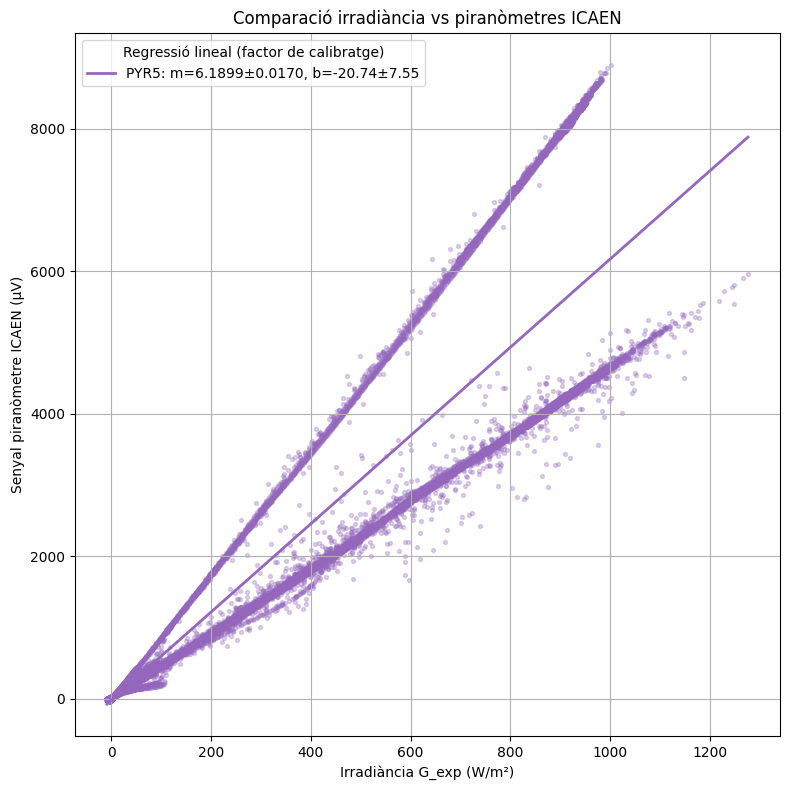

In [ ]:
# 3. Fem el gràfic comparatiu entre les nostres dades i les de l'ICAEN
# Tenint en compte que per series diferents son piranometres diferents

import numpy as np
import matplotlib.pyplot as plt

vsExp = True # True si volem comparar amb G_exp_list, False si volem comparar amb G_teo_list

serie_escollida = 1 # Seleccionem la serie (1 o 2). Sols analitzarem i graficarem els 6 d'aquesta sèries.

# Selecciona l'eix X: G_exp_list o G_teo_list
X = np.array(G_exp_list) if vsExp else np.array(G_teo_list)

# Llistes de piranòmetres
PYR_lists = [PYR1, PYR2, PYR3, PYR4, PYR5, PYR6]
labels = ['PYR1', 'PYR2', 'PYR3', 'PYR4', 'PYR5', 'PYR6']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Defineix quins vols mostrar, per exemple:
piranometresSeleccionats = {'PYR5'} 

plt.figure(figsize=(8,8))

for PYR, color, label in zip(PYR_lists, colors, labels):
    # Filtrem per la sèrie seleccionada
    if serie_escollida == 1 and 1:
        continue

    if label not in piranometresSeleccionats:
        continue
    Y = np.array(PYR) * 1000  # Convertim mV a μV
    mask = (~np.isnan(X)) & (~np.isnan(Y))
    X_valid = X[mask]
    Y_valid = Y[mask]
    if len(X_valid) > 1 and len(Y_valid) > 1:
        coef, cov = np.polyfit(X_valid, Y_valid, 1, cov=True)
        err_coef = np.sqrt(np.diag(cov))
        x_fit = np.linspace(min(X_valid), max(X_valid), 100)
        y_fit = coef[0]*x_fit + coef[1]
        plt.plot(x_fit, y_fit, '-', color=color, linewidth=2,
                 label=f"{label}: m={coef[0]:.4f}±{err_coef[0]:.4f}, b={coef[1]:.2f}±{err_coef[1]:.2f}")
        plt.scatter(X_valid, Y_valid, s=8, color=color, alpha=0.3)
    else:
        print(f"No hi ha dades suficients per {label}")

plt.xlabel(f'Irradiància {"G_exp" if vsExp else "G_teo"} (W/m²)')
plt.ylabel('Senyal piranòmetre ICAEN (μV)')
plt.title('Comparació irradiància vs piranòmetres ICAEN')
plt.legend(title="Regressió lineal (factor de calibratge)")
plt.grid(True)
plt.tight_layout()
plt.show()

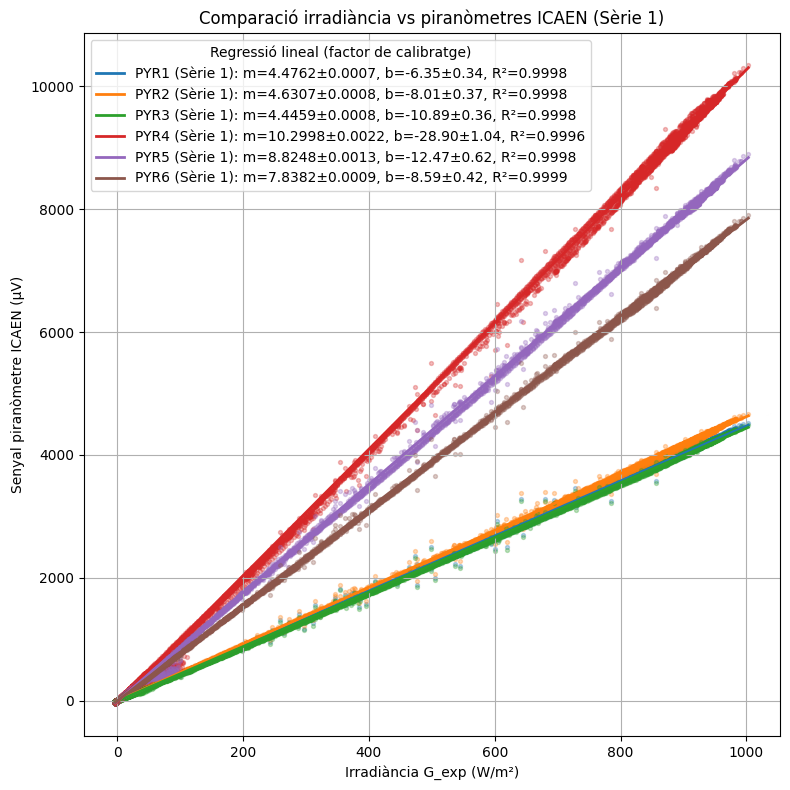

In [37]:
# 3. Fem el gràfic comparatiu entre les nostres dades i les de l'ICAEN
# Només es graficaran els registres amb SERIE == serie_escollida

import numpy as np
import matplotlib.pyplot as plt

vsExp = True # True si volem comparar amb G_exp_list, False si volem comparar amb G_teo_list

serie_escollida = 1 # Selecciona la sèrie (1 o 2)
piranometresSeleccionats = {'PYR1', 'PYR2', 'PYR3', 'PYR4', 'PYR5', 'PYR6'} # Exemple: {'PYR5', 'PYR3'}

# Selecciona l'eix X: G_exp_list o G_teo_list
X = np.array(G_exp_list) if vsExp else np.array(G_teo_list)

# Llistes de piranòmetres
PYR_lists = [PYR1, PYR2, PYR3, PYR4, PYR5, PYR6]
labels = ['PYR1', 'PYR2', 'PYR3', 'PYR4', 'PYR5', 'PYR6']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

plt.figure(figsize=(8,8))

# Filtra els índexs de la sèrie escollida
indices_serie = [i for i, s in enumerate(series) if s == serie_escollida]
X_filtrat = X[indices_serie]

for PYR, color, label in zip(PYR_lists, colors, labels):
    if label not in piranometresSeleccionats:
        continue

    # Filtra les dades del piranòmetre per la sèrie escollida
    Y_filtrat = np.array([PYR[i] for i in indices_serie]) * 1000  # mV a μV

    mask = (~np.isnan(X_filtrat)) & (~np.isnan(Y_filtrat))
    X_valid = X_filtrat[mask]
    Y_valid = Y_filtrat[mask]

    if len(X_valid) > 1 and len(Y_valid) > 1:
        coef, cov = np.polyfit(X_valid, Y_valid, 1, cov=True)
        ss_res = np.sum((Y_valid - (coef[0]*X_valid + coef[1]))**2)
        ss_tot = np.sum((Y_valid - np.mean(Y_valid))**2)
        r2 = 1 - ss_res/ss_tot
        err_coef = np.sqrt(np.diag(cov))
        x_fit = np.linspace(min(X_valid), max(X_valid), 100)
        y_fit = coef[0]*x_fit + coef[1]
        plt.plot(x_fit, y_fit, '-', color=color, linewidth=2,
                 label=f"{label} (Sèrie {serie_escollida}): m={coef[0]:.4f}±{err_coef[0]:.4f}, b={coef[1]:.2f}±{err_coef[1]:.2f}, R²={r2:.4f}")
        plt.scatter(X_valid, Y_valid, s=8, color=color, alpha=0.3)
    else:
        print(f"No hi ha dades suficients per {label} (Sèrie {serie_escollida})")

plt.xlabel(f'Irradiància {"G_exp" if vsExp else "G_teo"} (W/m²)')
plt.ylabel('Senyal piranòmetre ICAEN (μV)')
plt.title(f'Comparació irradiància vs piranòmetres ICAEN (Sèrie {serie_escollida})')
plt.legend(title="Regressió lineal (factor de calibratge)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_19820\3695363440.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_dates))


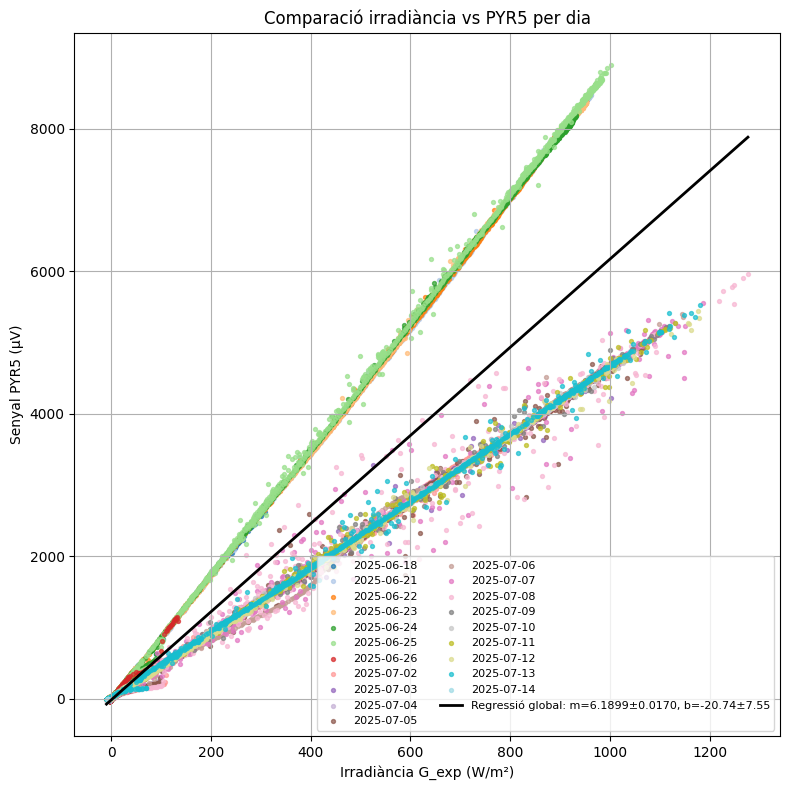

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Selecciona el piranòmetre (exemple: PYR5)
label = 'PYR5'
PYR = PYR5
Y = np.array(PYR) * 1000  # Convertim mV a μV
X = np.array(G_exp_list) if vsExp else np.array(G_teo_list)

# Llista de dates (ha de ser la mateixa longitud que PYR i X)
dates_array = np.array(dates)

# Filtra dades vàlides
mask = (~np.isnan(X)) & (~np.isnan(Y))
X_valid = X[mask]
Y_valid = Y[mask]
dates_valid = dates_array[mask]

# Assigna un color únic per cada dia
unique_dates = np.unique(dates_valid)
colors = plt.cm.get_cmap('tab20', len(unique_dates))

plt.figure(figsize=(8,8))
for i, dia in enumerate(unique_dates):
    idx = dates_valid == dia
    plt.scatter(X_valid[idx], Y_valid[idx], color=colors(i), s=8, alpha=0.7, label=dia if i < 20 else None)

# Regressió lineal global
if len(X_valid) > 1 and len(Y_valid) > 1:
    coef, cov = np.polyfit(X_valid, Y_valid, 1, cov=True)
    err_coef = np.sqrt(np.diag(cov))
    x_fit = np.linspace(min(X_valid), max(X_valid), 100)
    y_fit = coef[0]*x_fit + coef[1]
    plt.plot(x_fit, y_fit, 'k-', linewidth=2,
             label=f"Regressió global: m={coef[0]:.4f}±{err_coef[0]:.4f}, b={coef[1]:.2f}±{err_coef[1]:.2f}")

plt.xlabel(f'Irradiància {"G_exp" if vsExp else "G_teo"} (W/m²)')
plt.ylabel(f'Senyal {label} (μV)')
plt.title(f'Comparació irradiància vs {label} per dia')
plt.legend(loc='best', fontsize=8, ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

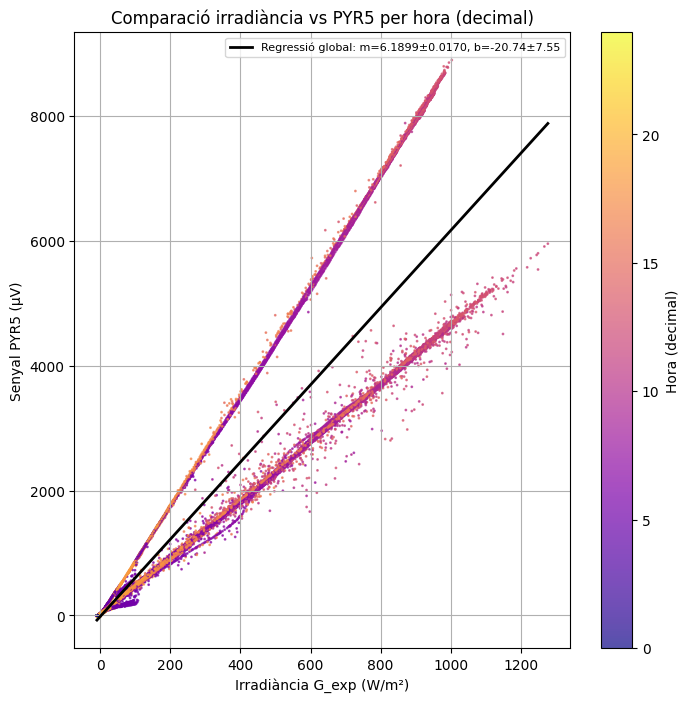

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Selecciona el piranòmetre (exemple: PYR5)
label = 'PYR5'
PYR = PYR5
Y = np.array(PYR) * 1000  # Convertim mV a μV
X = np.array(G_exp_list) if vsExp else np.array(G_teo_list)

# Converteix hores (format 'HH:MM:SS') a decimal
def hora_a_decimal(hora_str):
    h, m, s = map(int, hora_str.split(':'))
    return h + m/60 + s/3600

hores_decimal = np.array([hora_a_decimal(h) for h in hores])

# Filtra dades vàlides
mask = (~np.isnan(X)) & (~np.isnan(Y)) & (~np.isnan(hores_decimal))
X_valid = X[mask]
Y_valid = Y[mask]
hores_valid = hores_decimal[mask]

plt.figure(figsize=(8,8))
sc = plt.scatter(X_valid, Y_valid, c=hores_valid, cmap='plasma', s=1, alpha=0.7)
plt.colorbar(sc, label='Hora (decimal)')

# Regressió lineal global
if len(X_valid) > 1 and len(Y_valid) > 1:
    coef, cov = np.polyfit(X_valid, Y_valid, 1, cov=True)
    err_coef = np.sqrt(np.diag(cov))
    x_fit = np.linspace(min(X_valid), max(X_valid), 100)
    y_fit = coef[0]*x_fit + coef[1]
    plt.plot(x_fit, y_fit, 'k-', linewidth=2,
             label=f"Regressió global: m={coef[0]:.4f}±{err_coef[0]:.4f}, b={coef[1]:.2f}±{err_coef[1]:.2f}")

plt.xlabel(f'Irradiància {"G_exp" if vsExp else "G_teo"} (W/m²)')
plt.ylabel(f'Senyal {label} (μV)')
plt.title(f'Comparació irradiància vs {label} per hora (decimal)')
plt.legend(loc='best', fontsize=8)
plt.grid(True)